# Module 5: Data Manipulation 
## Case Study – 1  

In [47]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [48]:
# Load the data
data = pd.read_csv('HollywoodMovies.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie             970 non-null    object 
 1   LeadStudio        961 non-null    object 
 2   RottenTomatoes    913 non-null    float64
 3   AudienceScore     907 non-null    float64
 4   Story             641 non-null    object 
 5   Genre             691 non-null    object 
 6   TheatersOpenWeek  949 non-null    float64
 7   OpeningWeekend    969 non-null    float64
 8   BOAvgOpenWeekend  945 non-null    float64
 9   DomesticGross     970 non-null    float64
 10  ForeignGross      876 non-null    float64
 11  WorldGross        914 non-null    float64
 12  Budget            897 non-null    float64
 13  Profitability     896 non-null    float64
 14  OpenProfit        895 non-null    float64
 15  Year              970 non-null    int64  
dtypes: float64(11), int64(1), object(4)
memory u

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.1,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.6,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.5,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.7,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.1,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007


In [49]:
# Task 1: Find the highest-rated movie in the “Quest” story type.
quest_movies = data[data['Story'] == 'Quest']
highest_rated_quest_movie = quest_movies.loc[quest_movies['RottenTomatoes'].idxmax()]
print(f"Highest-rated movie in the 'Quest' story type: {highest_rated_quest_movie['Movie']}")
print(highest_rated_quest_movie)

Highest-rated movie in the 'Quest' story type: The Hurt Locker
Movie               The Hurt Locker
LeadStudio              Independent
RottenTomatoes                 97.0
AudienceScore                  83.0
Story                         Quest
Genre                         Drama
TheatersOpenWeek                4.0
OpeningWeekend                 0.14
BOAvgOpenWeekend            36338.0
DomesticGross                 17.01
ForeignGross                  32.21
WorldGross                    49.22
Budget                         15.0
Profitability                328.13
OpenProfit                     0.93
Year                           2009
Name: 343, dtype: object


In [50]:
# Task 2: Find the genre with the greatest number of movie releases.
most_common_genre = data['Genre'].value_counts().idxmax()
print(f"Genre with the greatest number of movie releases: {most_common_genre}")

data['Genre'].value_counts()

Genre with the greatest number of movie releases: Comedy


Genre
Comedy         177
Action         166
Drama          109
Horror          52
Animation       51
Thriller        35
Adventure       30
Romance         20
Crime           15
Biography       14
Documentary      7
Fantasy          6
Mystery          5
Musical          4
Name: count, dtype: int64

In [51]:
# Task 3: Print the names of the top five movies with the costliest budgets.
top_costliest_movies = data.nlargest(5, 'Budget')[['Movie', 'Budget']]
print("Top 5 costliest movies:")
print(top_costliest_movies)

Top 5 costliest movies:
                                          Movie  Budget
3      Pirates of the Caribbean: At World's End   300.0
468                                     Tangled   260.0
0                                  Spider-Man 3   258.0
241      Harry Potter and the Half-Blood Prince   250.0
586  Pirates of the Caribbean:On Stranger Tides   250.0


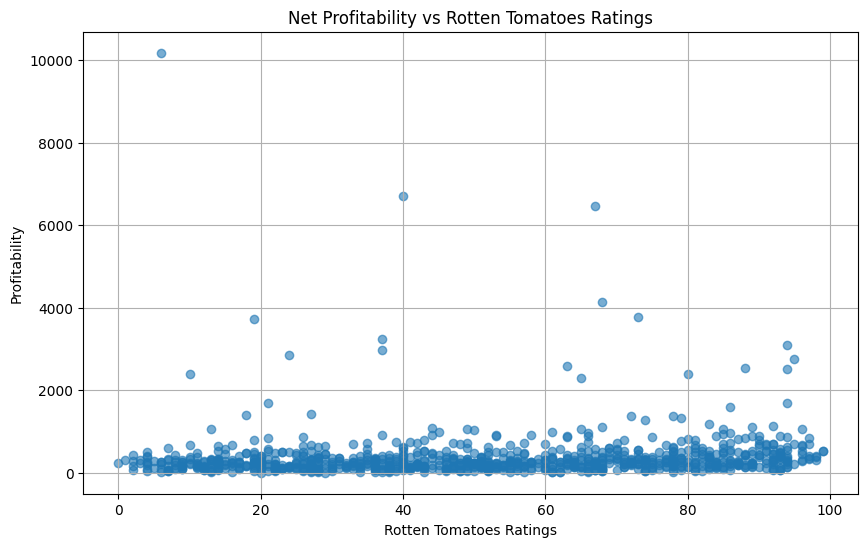

In [52]:
# Task 4: Analyze correspondence between critics’ evaluation and audience acceptance.
# Plotting profitability vs Rotten Tomatoes rating.
plt.figure(figsize=(10, 6))
plt.scatter(data['RottenTomatoes'], data['Profitability'], alpha=0.6)
plt.title("Net Profitability vs Rotten Tomatoes Ratings")
plt.xlabel("Rotten Tomatoes Ratings")
plt.ylabel("Profitability")
plt.grid()
plt.show()

In [67]:
# Task 5.1: Create a DataFrame from the raw data.
data_dict = {
    'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
    'last_name': ['Miller', 'Jacobson', '.', 'Milner', 'Cooze'],
    'age': [42, 52, 36, 24, 73],
    'preTestScore': [4, 24, 31, ".", "."],
    'postTestScore': ["25,000", "94,000", 57, 62, 70]
}
df = pd.DataFrame(data_dict)

# Task 5.2: Save the DataFrame into a CSV file as example.csv.
df.to_csv('example.csv', index=False)

# Task 5.3: Read the example.csv and print the DataFrame.
read_df = pd.read_csv('example.csv')
print("DataFrame read from example.csv:")
print(read_df)
print(read_df.info())

# Task 5.4: Read the example.csv without the column headings.
read_no_header_df = pd.read_csv('example.csv', header=None)
read_no_header_df = read_no_header_df.iloc[1:].reset_index(drop=True)  # Remove the first row (current header)
print("DataFrame read from example.csv without column headings:")
print(read_no_header_df)

# Task 5.5: Read example.csv and make the index columns 'First Name’ and 'Last Name'.
indexed_df = pd.read_csv('example.csv', index_col=['first_name', 'last_name'])
print("DataFrame with 'First Name' and 'Last Name' as index:")
print(indexed_df)
# Using the 'first_name' and 'last_name' index for quick lookups, unique row identifiers
print(indexed_df.loc[('Jason', 'Miller')])


# Task 5.6: Print the DataFrame in a Boolean form indicating null values.
bool_df = df.isnull()
print("Boolean DataFrame (True for Null, False for non-null):")
print(bool_df)

# Task 5.7: Skip the first 3 rows but retain the correct column headers
n=3
skipped_rows_df = pd.read_csv('example.csv', skiprows=range(1,n+1), header=0)
#skipped_rows_df = pd.read_csv('example.csv', skiprows=[1,2,3], header=0)
print("DataFrame after skipping the first 3 rows (headers retained):")
print(skipped_rows_df)

# Task 5.8
# Load the CSV while interpreting "," as a thousands separator
df = pd.read_csv('example.csv', thousands=",")
# Convert preTestScore to numeric, coercing invalid entries to NaN
df['preTestScore'] = pd.to_numeric(df['preTestScore'], errors='coerce')

# Display the updated DataFrame and data types
print("DataFrame after cleaning 'preTestScore':")
print(df)

print("\nData types after cleaning:")
print(df.dtypes)


DataFrame read from example.csv:
  first_name last_name  age preTestScore postTestScore
0      Jason    Miller   42            4        25,000
1      Molly  Jacobson   52           24        94,000
2       Tina         .   36           31            57
3       Jake    Milner   24            .            62
4        Amy     Cooze   73            .            70
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_name     5 non-null      object
 1   last_name      5 non-null      object
 2   age            5 non-null      int64 
 3   preTestScore   5 non-null      object
 4   postTestScore  5 non-null      object
dtypes: int64(1), object(4)
memory usage: 328.0+ bytes
None
DataFrame read from example.csv without column headings:
       0         1   2   3       4
0  Jason    Miller  42   4  25,000
1  Molly  Jacobson  52  24  94,000
2   Tina      

In [70]:
# 6 6. Perform Operations on Files  
# 6.1: From the raw data below create a Pandas Series

# Raw data
series_1 = pd.Series(['Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat'])

# a) Print all elements in lower case
print("Lowercase:")
print(series_1.str.lower())

# b) Print all elements in upper case
print("Uppercase:")
print(series_1.str.upper())

# c) Print the length of all the elements
print("Length of elements:")
print(series_1.str.len())

Lowercase:
0    amit
1     bob
2    kate
3       a
4       b
5     NaN
6     car
7     dog
8     cat
dtype: object
Uppercase:
0    AMIT
1     BOB
2    KATE
3       A
4       B
5     NaN
6     CAR
7     DOG
8     CAT
dtype: object
Length of elements:
0    4.0
1    3.0
2    4.0
3    1.0
4    1.0
5    NaN
6    3.0
7    3.0
8    3.0
dtype: float64


In [100]:
# 6.2: From the raw data below create a Pandas Series
# Raw data
series_2 = pd.Series([' Atul', 'John ', ' jack ', 'Sam'])

# a) Strip spaces from both sides
print("Strip spaces from both sides:")
print(series_2.str.strip())
#print(series_2.str.strip().str.len()) # to check

# b) Remove spaces from the left only
print("Strip spaces from the left only:")
print(series_2.str.lstrip())
#print(series_2.str.lstrip().str.len()) # to check

# c) Remove spaces from the right only
print("Strip spaces from the right only:")
print(series_2.str.rstrip())
# print(series_2.str.rstrip().str.len())  # to check


Strip spaces from both sides:
0    Atul
1    John
2    jack
3     Sam
dtype: object
Strip spaces from the left only:
0     Atul
1    John 
2    jack 
3      Sam
dtype: object
Strip spaces from the right only:
0     Atul
1     John
2     jack
3      Sam
dtype: object


In [73]:
# 6.3: -  Create a series from the raw data below 
# Raw data
series_3 = pd.Series(['India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'])

# a) Split strings wherever '_' occurs
print("Split strings into lists:")
print(series_3.str.split('_'))

# b) Access individual elements of a list
print("Access individual elements of a list:")
split_series = series_3.str.split('_')
print(split_series[0][1])  # Example: Access the second word of the first string

# c) Expand elements so that individual components are separate
print("Expand elements:")
print(series_3.str.split('_', expand=True))


Split strings into lists:
0           [India, is, big]
1     [Population, is, huge]
2                        NaN
3    [Has, diverse, culture]
dtype: object
Access individual elements of a list:
is
Expand elements:
            0        1        2
0       India       is      big
1  Population       is     huge
2         NaN      NaN      NaN
3         Has  diverse  culture


In [74]:
# 6.4: Create a series and replace either X or dog with XX-XX
# Raw data
series_4 = pd.Series(['A', 'B', 'C', 'AabX', 'BacX', '', np.nan, 'CABA', 'dog', 'cat'])

# Replace 'X' or 'dog' with 'XX-XX'
print("Replace 'X' or 'dog' with 'XX-XX':")
print(series_4.str.replace('X|dog', 'XX-XX', regex=True))


Replace 'X' or 'dog' with 'XX-XX':
0           A
1           B
2           C
3    AabXX-XX
4    BacXX-XX
5            
6         NaN
7        CABA
8       XX-XX
9         cat
dtype: object


In [83]:
# 6.5: Create a series and remove the dollars from the numeric values
# Raw data
series_5 = pd.Series(['12', '-$10', '$10,000'])

# Remove dollar signs
print("Remove dollar signs:")
print(series_5.str.replace('[$,]', '', regex=True).astype(float))

Remove dollar signs:
0       12.0
1      -10.0
2    10000.0
dtype: float64


In [84]:
# 6.6:- Create a series and reverse all lower case words 
# Raw data
series_6 = pd.Series(['India 1998', 'big country', np.nan])

# Reverse lowercase words
print("Reverse lowercase words:")
print(series_6.str.replace(r'\b[a-z]+\b', lambda x: x.group(0)[::-1], regex=True))


Reverse lowercase words:
0     India 1998
1    gib yrtnuoc
2            NaN
dtype: object


In [85]:
# 6.7: Create pandas series and print true if the value is alphanumeric in series or false if the value is not alphanumeric in series. 
# Raw data
series_7 = pd.Series(['1', '2', '1a', '2b', '2003c'])

# Check if values are alphanumeric
print("Check if values are alphanumeric:")
print(series_7.str.isalnum())


Check if values are alphanumeric:
0    True
1    True
2    True
3    True
4    True
dtype: bool


In [86]:
# 6.8: Create pandas series and print true if the value is containing ‘A’ 
# Raw data
series_8 = pd.Series(['1', '2', '1a', '2b', 'America', 'VietnAm', 'vietnam', '2003c'])

# Check if values contain 'A'
print("Check if values contain 'A':")
print(series_8.str.contains('A', case=False, na=False))


Check if values contain 'A':
0    False
1    False
2     True
3    False
4     True
5     True
6     True
7    False
dtype: bool


In [87]:
# 6.9: Create pandas series and print in three columns value 0 or 1 is a or b or c exists in values
# Raw data
series_9 = pd.Series(['a', 'a|b', np.nan, 'a|c'])

# Check for 'a', 'b', or 'c'
print("Check for 'a', 'b', or 'c':")
print(pd.DataFrame({
    'contains_a': series_9.str.contains('a', na=False),
    'contains_b': series_9.str.contains('b', na=False),
    'contains_c': series_9.str.contains('c', na=False),
}))


Check for 'a', 'b', or 'c':
   contains_a  contains_b  contains_c
0        True       False       False
1        True        True       False
2       False       False       False
3        True       False        True


In [88]:
# 6.10: Create pandas dataframe having keys and ltable and rtable as below 
# Left table
ltable = pd.DataFrame({'key': ['One', 'Two'], 'ltable': [1, 2]})

# Right table
rtable = pd.DataFrame({'key': ['One', 'Two'], 'rtable': [4, 5]})

# Merge tables on 'key'
merged_table = pd.merge(ltable, rtable, on='key')
print("Merged table:")
print(merged_table)


Merged table:
   key  ltable  rtable
0  One       1       4
1  Two       2       5
